In [15]:
import pickle

#unpacking the file
with open('/content/drive/MyDrive/Colab Notebooks/Distracted Driver/Codes, Input & Output Datas/images.p', 'rb') as f:
    images = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/Distracted Driver/Codes, Input & Output Datas/labels.p', 'rb') as f:
    labels = pickle.load(f)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
print(images.shape)
print(labels.shape)

(22424, 100, 100)
(22424,)


In [17]:
set(labels)

{'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'}

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [19]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [20]:
import numpy as np

In [21]:
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons:  10
0 --> c0
1 --> c1
2 --> c2
3 --> c3
4 --> c4
5 --> c5
6 --> c6
7 --> c7
8 --> c8
9 --> c9


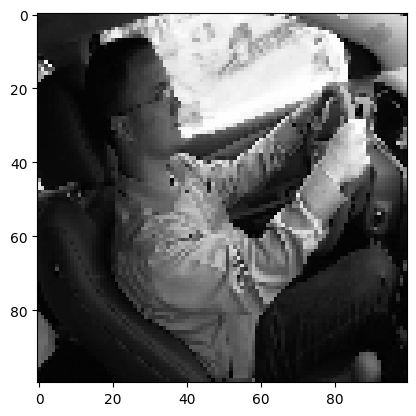

In [23]:
import matplotlib.pyplot as plt

plt.imshow(images[77], cmap=plt.get_cmap("gray"))
plt.show()

In [24]:
import cv2

In [25]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [26]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (22424, 100, 100, 1)


In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
labels = to_categorical(labels)

In [29]:
categories = labels.shape[1]
print(categories)

10


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D
# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,GlobalAveragePooling2D

from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.callbacks import ReduceLROnPlateau

In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape = (100,100,1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation("softmax"))
#model.build((0,100,100,1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 32)        │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 33, 33, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 33, 33, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 33, 33, 64)          │             132 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 33, 33, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 33, 33, 64)          │             132 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │              

 Total params: 8,681,954 (33.12 MB)

 Trainable params: 8,679,510 (33.11 MB)

 Non-trainable params: 2,444 (9.55 KB)

In [33]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.000001)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [34]:
#compiling the model
model.compile(RMSprop(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [35]:
h = model.fit(images,labels,validation_split=0.01,batch_size=250,epochs=10,verbose=1)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 183ms/step - accuracy: 0.6908 - loss: 1.0592 - val_accuracy: 0.0000e+00 - val_loss: 2.7556
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step - accuracy: 0.9908 - loss: 0.0544 - val_accuracy: 0.0000e+00 - val_loss: 4.2120
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9980 - loss: 0.0134 - val_accuracy: 0.0000e+00 - val_loss: 5.8537
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9976 - loss: 0.0118 - val_accuracy: 0.0000e+00 - val_loss: 5.0748
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.0400 - val_loss: 3.3114
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9511 - val_loss: 0.1956
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 1.0000 - loss: 4.0496e-04 - val_accuracy: 0.9822 - val_loss: 0.0578
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 1.0000 - loss: 2.5832e-0

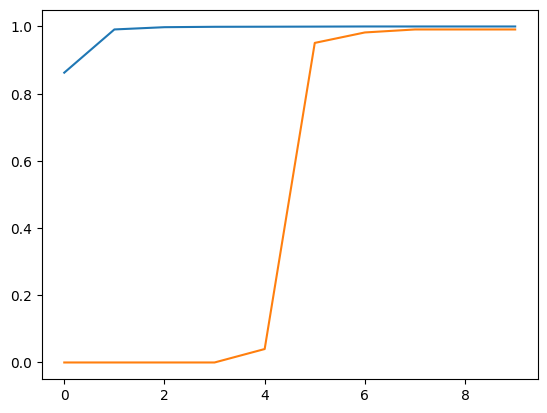

In [36]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()

In [37]:
from tensorflow.keras.models import Model

In [38]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [39]:
features.shape

(1, 100, 100, 32)

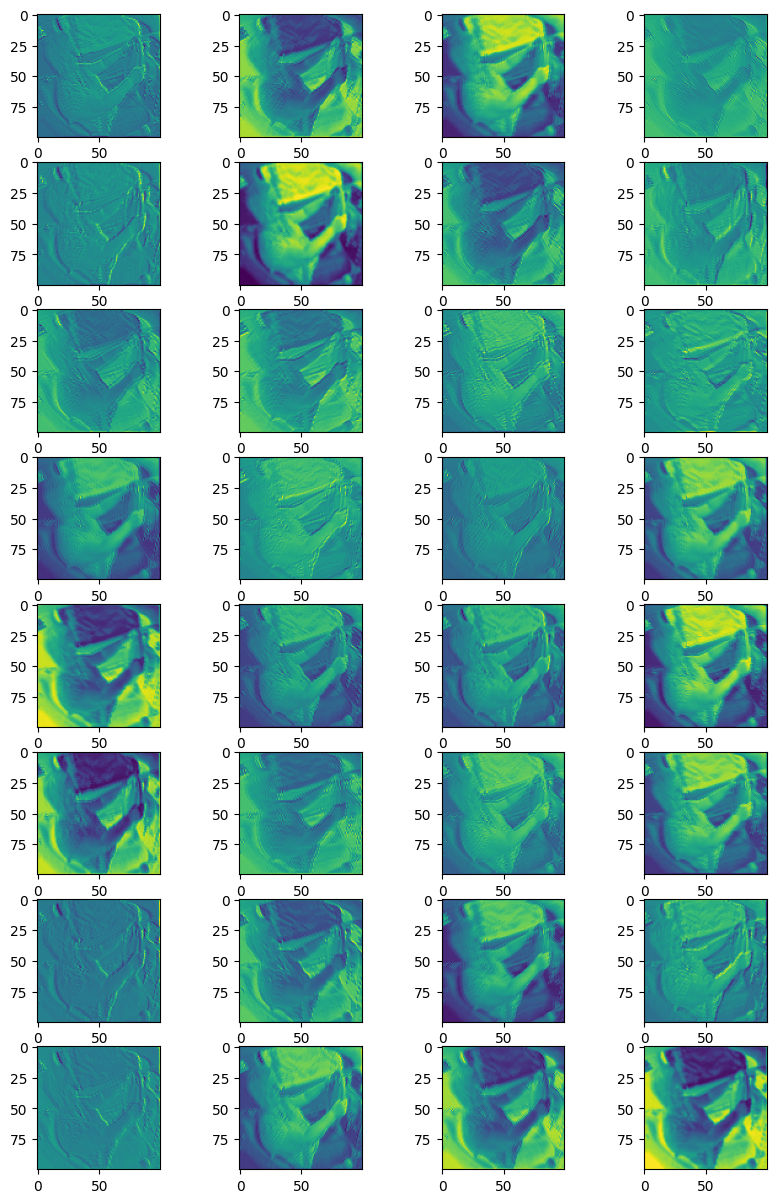

In [40]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [65]:
from google.colab import files
upload=files.upload()

Saving img_33.jpg to img_33.jpg


In [67]:
d=list(upload.keys())[0]

[255 216 255 ... 207 255 217]


<ipython-input-68-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


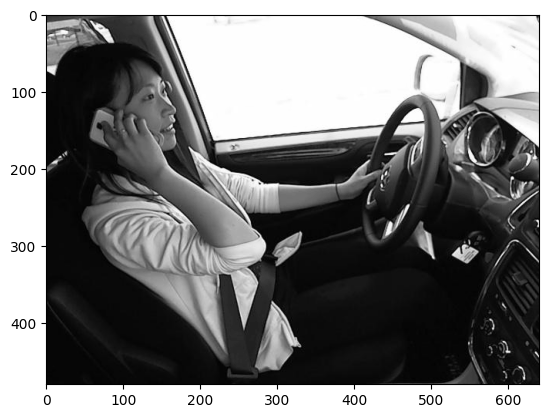

In [68]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [69]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)

In [61]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[9.8511660e-01 3.5799650e-07 5.6477465e-06 2.5724952e-07 5.5747023e-06
  5.6816348e-06 3.7296320e-07 2.0151059e-05 6.0043913e-06 1.4839395e-02]]


In [62]:
prediction=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [63]:
p=np.argmax(prediction,axis=1)
l = p.tolist()
l

[0]

Safe driving


<ipython-input-64-94b2b45b4bbc>:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


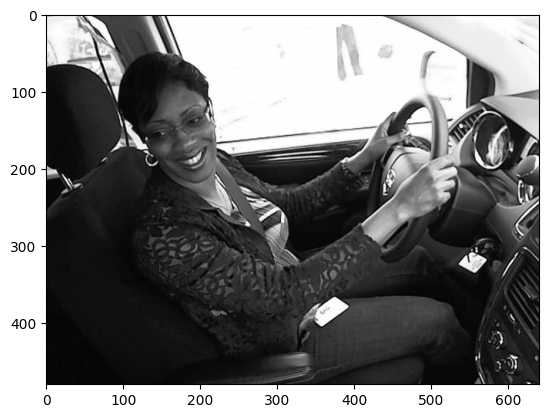

In [64]:
for i in l:
  if i == 0:
    print('Safe driving')
  elif i == 1:
    print('Texting - right')
  elif i == 2:
    print('Talking on the phone - right')
  elif i == 3:
    print('Texting - left')
  elif i == 4:
    print('Talking on the phone - left')
  elif i == 5:
    print('Operating the radio')
  elif i == 6:
    print('Drinking')
  elif i == 7:
    print('Reaching behind')
  elif i == 8:
    print('Hair and makeup')
  elif i == 9:
    print('Talking to passenger')

a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap=plt.get_cmap("gray"))